<a href="https://colab.research.google.com/github/saisruthig/sentiment_analysis/blob/main/Sentiment_Analysis_News_Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SENTIMENT ANALYSIS ON NEWS ARTICLES**

In [ ]:
!pip install vaderSentiment

**# using Sentiment Intensity Analyser from Vader Sentiment**

In [7]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vs=SentimentIntensityAnalyzer()

In [ ]:
text='The product is really good'
vs.polarity_scores(text)

{'compound': 0.4927, 'neg': 0.0, 'neu': 0.556, 'pos': 0.444}

In [ ]:
text2='Who all loves older size i.e., 4.7 inch should definitely go for this.Nothing is better than XR,XS or 11.Best for price and usage'
vs.polarity_scores(text)

{'compound': 0.4927, 'neg': 0.0, 'neu': 0.556, 'pos': 0.444}

In [ ]:

text3='Everything is fine of the mobile except battery'
vs.polarity_scores(text)

{'compound': 0.4927, 'neg': 0.0, 'neu': 0.556, 'pos': 0.444}

**# WEB SCRAPING**

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os

In [ ]:
url='https://www.inshorts.com/en/read/sports'
news_data=[]
new_category=url.split('/')[-1]
data=requests.get(url)
soup=BeautifulSoup(data.content)
print(soup)

In [10]:
url=['https://www.inshorts.com/en/read/sports']

def build_dataset(url):
  news_data=[]
  for u in url:
    soup=BeautifulSoup(requests.get(u).content)
    category=u.split('/')[-1]                           
    news_article =[{'news_headline': headline.find('span', attrs={"itemprop":"headline"}).string,
                    'news_article': article.find('div', attrs={"itemprop":"articleBody"}).string,
                    'news_category': category}
                   for headline,article in zip(soup.find_all('div',class_=["news-card-title news-right-box"]),
                                               soup.find_all('div',class_=["news-card-content news-right-box"]))
                   ]
    news_article = news_article[0:20]
    news_data.extend(news_article)
  df=pd.DataFrame(news_data)
  df=df[['news_headline','news_article', 'news_category']]
  return df


**# Building Dataset**

In [11]:
df=build_dataset(url)
df

,news_headline,news_article,news_category
0,David Beckham's son Brooklyn marries actress N...,Former England football team captain David Bec...,sports
1,26-year-old man arrested for invading pitch an...,A 26-year-old man has been arrested by Pune Po...,sports
2,Rahul Tewatia should be nicknamed 'Iceman': Su...,Referring to Rahul Tewatia slamming two sixes ...,sports
3,Virat Kohli gets angry after controversial dis...,A video of RCB batter Virat Kohli's reaction t...,sports
4,Jaffer shares scene from Yuvraj's movie as chi...,Wasim Jaffer took to Twitter to share a scene ...,sports
5,"I thanked MSD, he said 'I had nothing to do wi...",Robin Uthappa revealed that two days after IPL...,sports
6,RCB hand MI their 4th straight defeat in IPL 2...,RCB defeated MI by seven wickets to register t...,sports
7,Harbhajan Singh asks Ashish Nehra what Rahul T...,After GT all-rounder Rahul Tewatia slammed two...,sports
8,Iceland Cricket mock third umpire over Virat K...,Iceland Cricket mocked the third umpire over e...,sports
9,Table-toppers KKR to bowl first against sevent...,Table-toppers KKR won the toss and elected to ...,sports


In [13]:
df=build_dataset(url)
df.tail()

,news_headline,news_article,news_category
15,Ross Taylor replies in Hindi to Sachin Tendulk...,Former New Zealand batter Ross Taylor took to ...,sports
16,Woman shares pics of 14-yr-old son's bruised h...,After Manchester United forward Cristiano Rona...,sports
17,All-round game: Jaffer on SRH opener Abhishek'...,Praising Abhishek Sharma for his 50-ball 75 in...,sports
18,MI and DC have weakened bowling departments in...,Ravi Shastri has said MI and DC are the two te...,sports
19,Anyone will be happy to get him: SRH debutant ...,"Pacer Marco Jansen, who took MS Dhoni's wicket...",sports


In [14]:
df.to_csv('news.csv',index=False)

**Reading data from the news.csv file**

In [15]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/krishna2824/krishna-shree/master/news.csv')
df


,news_headline,news_article,news_category
0,I will eat ice-cream with you after the Tokyo ...,During an online interaction with India's Toky...,sports
1,ICC don't want me to use 'The Universe Boss' s...,Talking about using just 'The Boss' sticker in...,sports
2,Fan's 2013 tweet predicting Italy's win over E...,A football fan's eight-year-old tweet correctl...,sports
3,"F1 driver Lando's £40,000 watch stolen outside...",British-Belgian Formula One driver Lando Norri...,sports
4,Crawl back under your rock: UK PM to those rac...,Condemning people who are racially abusing Eng...,sports
5,"India to send 228 members to Tokyo Games, its ...",India will be sending a 228-strong contingent ...,sports
6,Was excited to show him what we've done: '83' ...,Following the demise of former Indian crickete...,sports
7,History will never forget you: Jatin Sarna on ...,Actor Jatin Sarna took to Instagram to mourn t...,sports
8,Copa America Trophy to be minted as NFT,Community-oriented platform Ethernity Chain ha...,sports
9,Plenty still left in the tank: Gayle on becomi...,"After becoming the first batsman to reach 14,0...",sports


**# installing the Natural Language Toolkit**

In [16]:
!pip install nltk

In [17]:
import nltk
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
len(stopword_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


179

**# function to remove HTML tag**

In [ ]:

def html_tag(text):
  soup=BeautifulSoup(text,"html.parser")
  new_text = soup.get_text()
  return new_text

****

**# Expand Contraction**

In [ ]:
!pip install contractions
import contractions
def con(text):
  expand=contractions.fix(text)
  return expand
con("Y'all can't expand I'd think")

     |████████████████████████████████| 106 kB 6.9 MB/s 
     |████████████████████████████████| 287 kB 46.9 MB/s 


'You all cannot expand I would think'

**# removal of special charecters**

In [19]:
import re
def remove_sp(text):
  pattern= r'[^A-Za-z0-9\s]'
  text= re.sub(pattern,'',text)
  return text

remove_sp("weel this was fun !! what do you think?. #123")

'weel this was fun  what do you think 123'

**# using Toktok Tokenizer from nltk(Natural Language Toolkit) for Tokenization**

In [20]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer

In [21]:
#removal of stopwords
tokenizer = ToktokTokenizer()
def remove_stopwords(text):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  filtered_tokens = [token for token in tokens if token not in stopword_list]
  filtered_text= ' '.join(filtered_tokens)
  return filtered_text


In [22]:
#1. Lower case
#2. HTMP tags
#3. Contractions
#4. Stopwords
df.news_headline=df.news_headline.apply(lambda x:x.lower())
df.news_article=df.news_article.apply(lambda x:x.lower())


df.news_headline=df.news_headline.apply(html_tag)
df.news_article=df.news_article.apply(html_tag)

'''df.news_headline=df.news_headline.apply(con)
df.news_article=df.news_article.apply(con)'''


df.news_headline=df.news_headline.apply(remove_sp)
df.news_article=df.news_article.apply(remove_sp)

df.news_headline=df.news_headline.apply(remove_stopwords)
df.news_article=df.news_article.apply(remove_stopwords)

**# dataset labeling and processing**

In [23]:
df['compound'] = df['news_headline'].apply(lambda x: vs.polarity_scores(x)['compound'])
df.head()

,news_headline,news_article,news_category,compound
0,eat icecream tokyo olympics pm modi pv sindhu,online interaction indias tokyobound athletes ...,sports,0.0000
1,icc dont want use universe boss sticker chris ...,talking using boss sticker instead universe bo...,sports,-0.0572
2,fans 2013 tweet predicting italys win england ...,football fans eightyearold tweet correctly pre...,sports,0.5859
3,f1 driver landos 40000 watch stolen outside we...,britishbelgian formula one driver lando norris...,sports,-0.4939
4,crawl back rock uk pm racially abusing footbal...,condemning people racially abusing england pla...,sports,-0.4588


**Data Finalization**

In [24]:
def predict(comp):
  comp=float(comp)
  if (comp>0):
    return 'positive'
  elif (comp==0):
    return 'neutral'
  else:
    return 'negative'
df['type_pred'] = df['compound'].apply(predict)
df.head()

,news_headline,news_article,news_category,compound,type_pred
0,eat icecream tokyo olympics pm modi pv sindhu,online interaction indias tokyobound athletes ...,sports,0.0000,neutral
1,icc dont want use universe boss sticker chris ...,talking using boss sticker instead universe bo...,sports,-0.0572,negative
2,fans 2013 tweet predicting italys win england ...,football fans eightyearold tweet correctly pre...,sports,0.5859,positive
3,f1 driver landos 40000 watch stolen outside we...,britishbelgian formula one driver lando norris...,sports,-0.4939,negative
4,crawl back rock uk pm racially abusing footbal...,condemning people racially abusing england pla...,sports,-0.4588,negative


**# installing matplotlib**

In [32]:
pip install matplotlib

**# finding polarity of all the data items(News Articles of domains- Sports, Politics and World)**

In [26]:
Polarity = df.compound
print(Polarity)


0     0.0000
1    -0.0572
2     0.5859
3    -0.4939
4    -0.4588
5     0.0000
6    -0.3612
7    -0.4997
8     0.0000
9     0.0000
10    0.5859
11    0.0000
12   -0.3818
13    0.2023
14    0.0000
15    0.1531
16   -0.5994
17    0.0000
18    0.0000
19   -0.4404
20   -0.4939
21    0.3818
22   -0.4588
23    0.5106
24    0.0000
25   -0.2263
26   -0.8910
27    0.0000
28   -0.3400
29    0.0000
30    0.3612
31    0.0000
32   -0.5106
33    0.0000
34   -0.6249
35   -0.5423
36   -0.1027
37   -0.8020
38    0.0000
39   -0.7650
40   -0.5106
41    0.0000
42    0.0000
43    0.0000
44    0.0000
45   -0.3400
46    0.0000
47    0.2263
48    0.0000
49    0.0000
50   -0.8176
51    0.0000
52    0.0000
53   -0.2500
54    0.0000
55    0.0000
56   -0.8271
57    0.0000
58   -0.4023
59   -0.5267
Name: compound, dtype: float64


In [27]:
df.iloc[56]

news_headline    dna test ordered identify body man died wb vio...
news_article     calcutta hc tuesday ordered dna test identify ...
news_category                                             politics
compound                                                   -0.8271
type_pred                                                 negative
Name: 56, dtype: object

**# Plot for the News Articles(all domains-Sports, Politics and World)**

Text(0, 0.5, 'Compound Score')

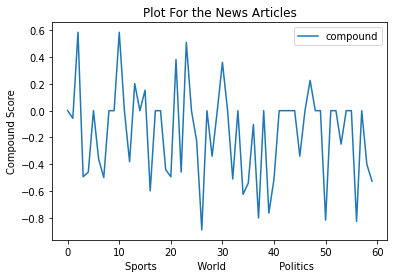

In [31]:
import matplotlib.pyplot as plt
df.plot(y="compound")
plt.title("Plot For the News Articles")
plt.xlabel("Sports             World                 Politics")
plt.ylabel("Compound Score")

In [ ]:
for i, g in df.groupby(['compound']):
    print (g)

                                        news_headline  \
26  2 pet dogs killed pakistan attacking lawyer vi...   

                                         news_article news_category  compound  \
26  two pet dogs attacked injured lawyer pakistans...         world    -0.891   

   type_pred  
26  negative  
                                        news_headline  \
56  dna test ordered identify body man died wb vio...   

                                         news_article news_category  compound  \
56  calcutta hc tuesday ordered dna test identify ...      politics   -0.8271   

   type_pred  
56  negative  
                                        news_headline  \
50  kejriwal done phd lying anil vij water crisis ...   

                                         news_article news_category  compound  \
50  delhi government blamed haryana national capit...      politics   -0.8176   

   type_pred  
50  negative  
                                        news_headline  \
37  4 civilians kil

In [ ]:
total_score = df['news_category'].groupby(df['type_pred'])

# printing the means value
print(total_score.count())	


type_pred
negative    26
neutral     26
positive     8
Name: news_category, dtype: int64


**# Consolidated Polarity Score of all the Domains(Sports, World, Politics)** 

In [ ]:
total_Polarity=df.groupby(df['compound'])
print(total_polarity.mean())

type_pred
negative   -0.489392
neutral     0.000000
positive    0.375887
Name: compound, dtype: float64


**# PIE CHART For Polarity across all the Domains(Sports, World, Politics)**

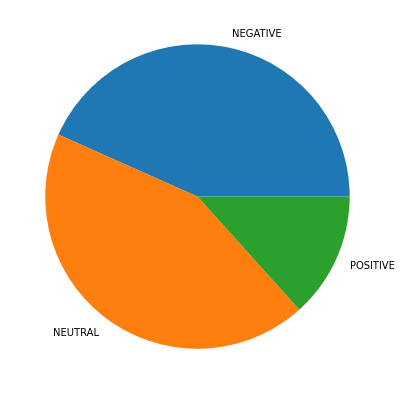

In [ ]:
Emotion = ['NEGATIVE','NEUTRAL','POSITIVE']
 
data = [26,26,8]
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels =Emotion)
 
# show plot
plt.show()

**CONCLUSION:**


*We have simplified the sentiment expressed in the News Articles into  negative, neutral or positive emotion.*